# 01: General `lumispy` workflow

## Energy conversion and model fitting

This notebook shows:

- Plotting cathodoluminescence data in different ways (and interactively)
- Converting wavelength signal axis to energy signal axis
(**Required versions: hyperspy>=1.7.0 and lumispy>=0.2**)
- Gaussian fitting

**Note for M&M 2022**: This notebook was copied from a the LumiSpy demo repostitory and only minor changes were made to ensure it runs with the current Hyperspy-bundle installation. The original copy can be found at https://github.com/LumiSpy/lumispy-demos

- Joshua Taillon, July 25, 2022

Import packages:

In [1]:
%matplotlib notebook
# Use '%matplotlib widget' in JupterLab and '%matplotlib notebook' in JupyterNotebook for interactive inline functionality (e.g. on binder)
#For pop-up window plots on your local computer, use '%matplotlib tk' or '%matplotlib qt' instead
import lumispy as lum
import hyperspy.api as hs
import os
import matplotlib.pyplot as plt

## Loading the pre-processed CL-SEM file

Load the `.hspy` file, which has already been pre-processed (background subtracted, spike removed and spectral corrected). See microscope-specific tutorials on how to do that.

*You can also leave the path empty. A pop-up window will appear to select the `.hspy` file from the browser.*

In [3]:
# Load file
path = os.path.relpath("demo-files/01/01_demo.hspy")
cl_sem = hs.load(path, signal_type='CL_SEM')

# examine the CL-SEM signal (unique to LumiSpy)
print(cl_sem)

<CLSEMSpectrum, title: cathodoluminescence_example, dimensions: (40, 30|1015)>


In [4]:
# examine the CL-SEM signal metadata
cl_sem.metadata

├── Acquisition_instrument
│   ├── CCD
│   │   ├── amplification = 1
│   │   ├── binning = 1
│   │   ├── channels = 1024
│   │   ├── exposure_time_s = 0.05
│   │   └── readout_rate_khz = 1
│   ├── SEM
│   │   ├── FOV = 8356.175781
│   │   ├── aperture_um = 100.0
│   │   ├── beam_acc_voltage_kv = 6.003
│   │   ├── chamber_pressure_torr = 1.1101e-07
│   │   ├── dwell_time_scan_s = 0.050000000999999995
│   │   ├── gun_lens_amps = 1.2
│   │   ├── obj_lens_amps = 0.326228
│   │   ├── real_magnification = 8356.1757
│   │   ├── resolution_x = 256
│   │   └── resolution_y = 256
│   ├── Spectrometer
│   │   ├── central_wavelength_nm = 500.0
│   │   └── grating = 150.0
│   └── acquisition_system = cambridge_uk_attolight
├── General
│   ├── FileIO
│   │   ├── 0
│   │   │   ├── hyperspy_version = 1.7.0
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = load
│   │   │   └── timestamp = 2022-06-03T20:11:20.465857+02:00
│   │   ├── 1
│   │   │   ├── hyperspy_version = 1.7.0
│   │   │   ├── io_plugin = hyperspy.io_plugins.hspy
│   │   │   ├── operation = save
│   │   │   └── timestamp = 2022-06-03T20:12:54.266881+02:00
│   │   └── 2
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.hspy
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:20:09.380316-06:00
│   ├── folder_path = C:\Users\jf631\Documents\GitHub\jordiferrero\nanoDTC\python_demo_notebooks\luminescence_demos\data\cathodoluminescence_example
│   └── title = cathodoluminescence_example
└── Signal
    ├── background = array([[224.11201, 224.65461, 225.1972 , ..., 771.68262, 772.21087,
        77 ... 4.     , 654.     , 654.     , ..., 653.     , 654.     ,
        654.     ]])
    ├── cosmic_rays_subtracted_extra_percent = 50
    ├── cropped_edges = 5
    ├── grating_corrected = True
    └── signal_type = CL_SEM

## Plotting data

Plot the hyperspectral data:

<IPython.core.display.Javascript object>


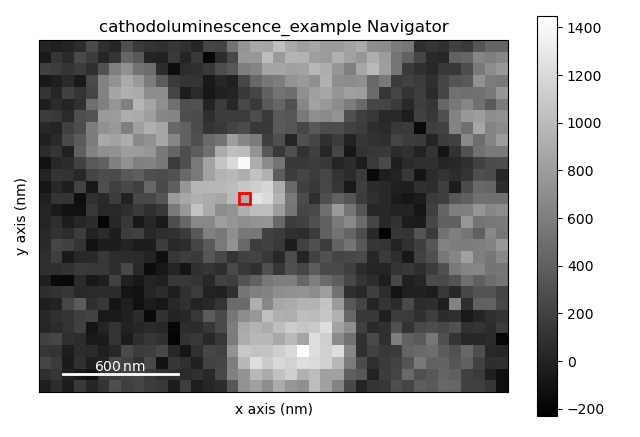

<IPython.core.display.Javascript object>


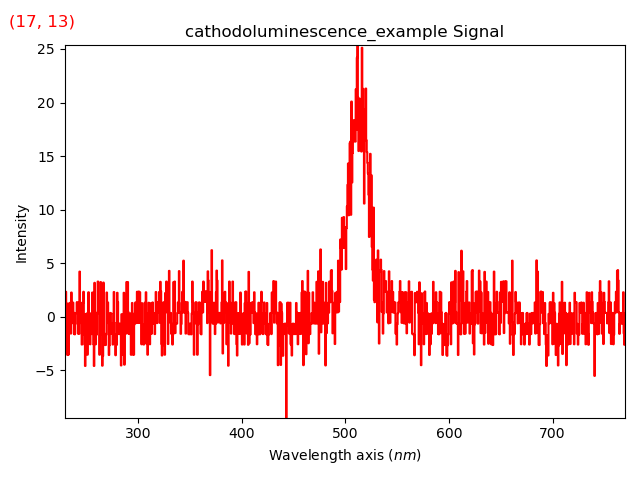

In [5]:
# plot the hyperspectral CL-SEM data
cl_sem.plot()

Plot the average CL spectrum:

<IPython.core.display.Javascript object>


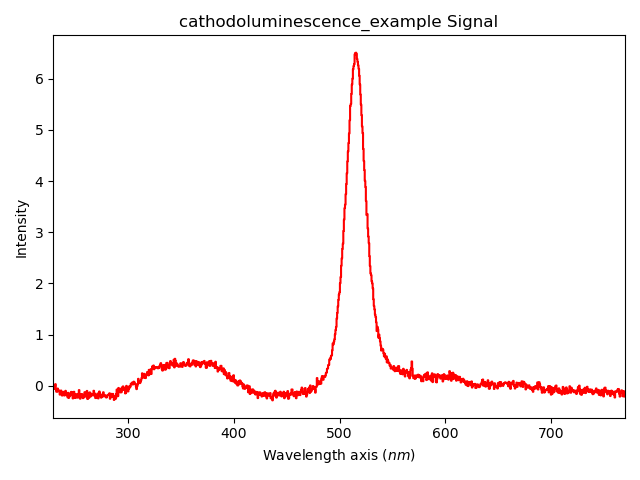

In [6]:
# Plot the mean CL spectrum
cl_sem.mean().plot()

### Chromatic imaging:

Plot the panchromatic image:

<IPython.core.display.Javascript object>


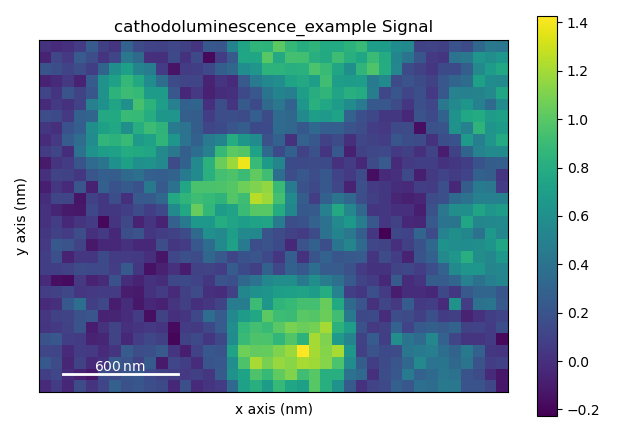

In [7]:
# plot a panchromatic image
cl_sem.T.mean().plot(cmap='viridis')

Get the colour filtered panchromatic images.
Select the energy region to plot as coloured image interactively.

<IPython.core.display.Javascript object>


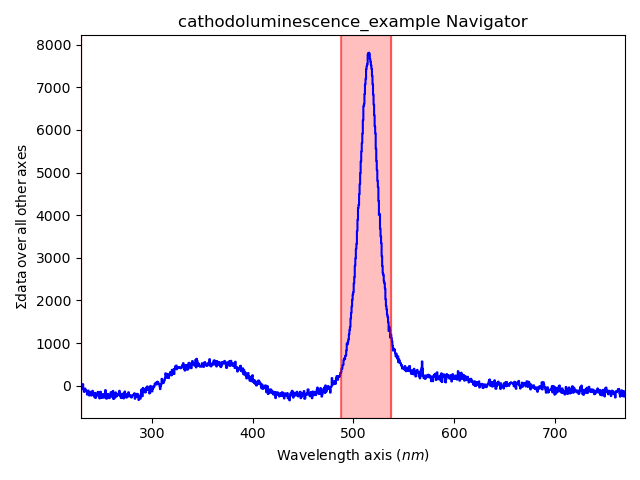

<IPython.core.display.Javascript object>


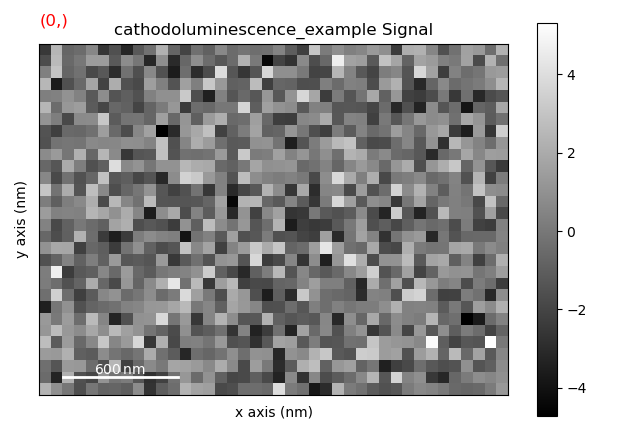

<IPython.core.display.Javascript object>


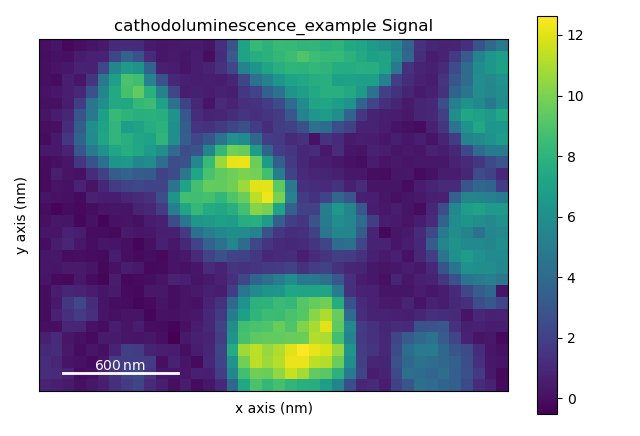

In [8]:
# transpose the CL-SEM data
im = cl_sem.T

# plot as an image
im.plot()

# create a SpanROI and interactively select the energy range to plot
roi1 = hs.roi.SpanROI(left=455, right=485) #sets a digitalbandfilter
im_roi1 = roi1.interactive(im, color="red")
im_roi1_mean = hs.interactive(im_roi1.mean,
                              event=roi1.events.changed,
                              recompute_out_event=None)

# plot the mean of the ROI
im_roi1_mean.plot(cmap='viridis')

<IPython.core.display.Javascript object>


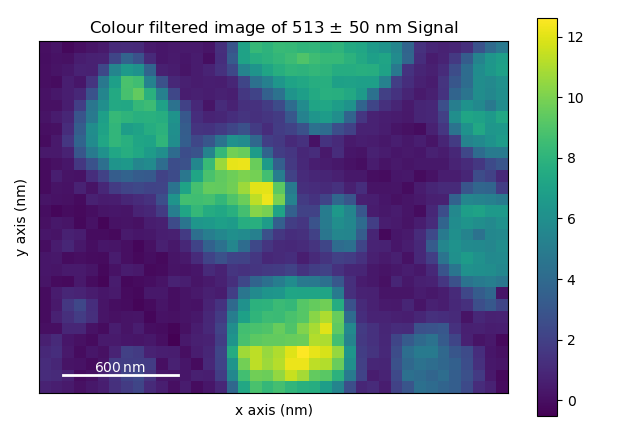

In [10]:
# Take the mean of the energy-filtered image
im_filtered = roi1(im).mean()

# calculate the width and center of the ROI
roi_width = roi1.right - roi1.left
roi_centre = roi1.left + 0.5* roi_width

# plot the filtered image with proper title
im_filtered.metadata.General.title = "Colour filtered image of {:.0f} $\pm$ {:.0f} nm".format(roi_centre, roi_width)
im_filtered.plot(cmap='viridis')

## Wavelength to energy conversion

Required versions: hyperspy>=1.7.0 and lumispy>=0.2

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/hyperspy/signal.py:3851: UserWarning: You are summing over an unbinned, non-uniform axis. The result can not be used as an approximation of the integral of the signal. For this functionality, use integrate1D instead.
  warnings.warn("You are summing over an unbinned, non-uniform axis. "


<IPython.core.display.Javascript object>


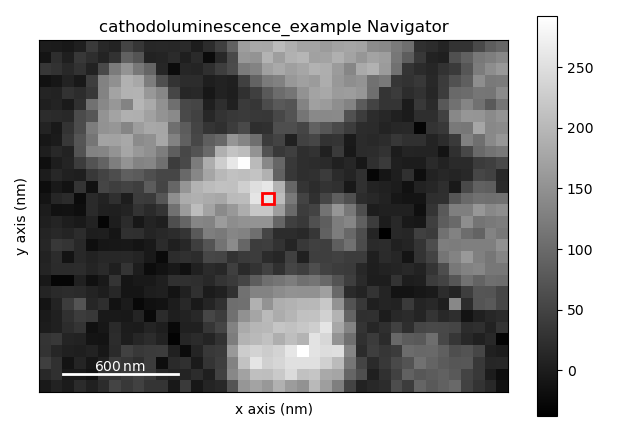

<IPython.core.display.Javascript object>


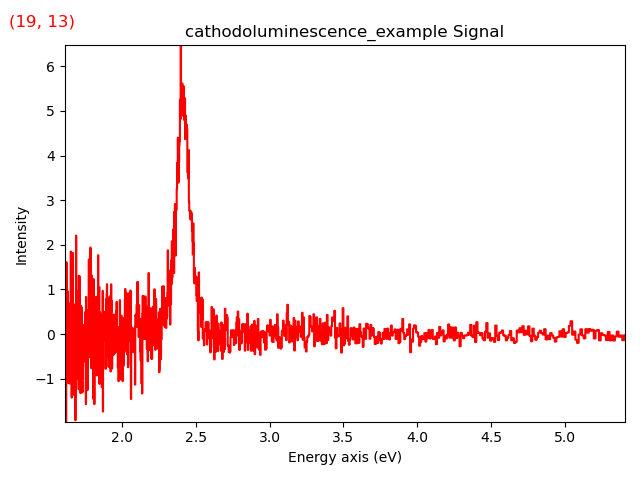

In [11]:
# convert CL-SEM data to eV rather than wavelength and plot
cl_sem_eV = cl_sem.to_eV(inplace=False)
cl_sem_eV.plot()

## Fitting Gaussian

Select the starting parameters

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/hyperspy/signal.py:3851: UserWarning: You are summing over an unbinned, non-uniform axis. The result can not be used as an approximation of the integral of the signal. For this functionality, use integrate1D instead.
  warnings.warn("You are summing over an unbinned, non-uniform axis. "


<IPython.core.display.Javascript object>


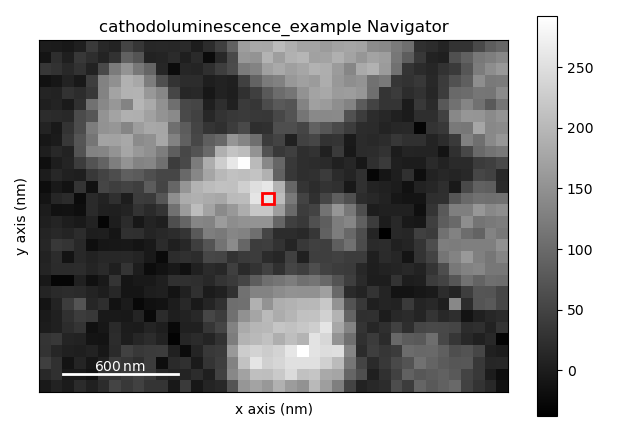

<IPython.core.display.Javascript object>


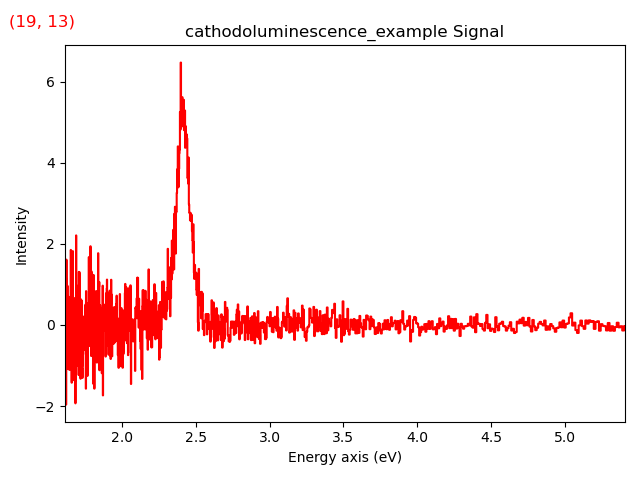

In [12]:
# plot the data to start the fitting procedure
cl_sem_eV.plot()

In [14]:
# we recommend using the following starting parameters for the model

####################################
#MODEL
g1_centre = 2.4   # Guess for centre wavelength
g1_max = g1_centre + 0.2      # Max value for centre wavelength
g1_min = g1_centre - 0.2     # Min value for centre wavelength

g1_fwhm = 0.1            #Guess for FWHM
g1_fwhm_max = 0.5       #Maxvalue for FWHM
g1_fwhm_min = 0.01         #Minvalue for FWHM

g1_h = 5           #Guess for peak Intensity
g1_h_max = 50      #Maxvalue for peak Intesity
g1_h_min = 0         #Minvalue for peak Intensity

bkg_offset = 1  #Background to be substracted

In [15]:
# create the CL model
m = cl_sem_eV.create_model()

# add a Background offset
bkg = hs.model.components1D.Offset()

# add a Gaussian peak
g1 = hs.model.components1D.Expression(
    expression="height * exp(-(x - x0) ** 2 * 4 * log(2)/ fwhm ** 2)",
    name="Perovskite Peak", position="x0",
    height=1, fwhm=1, x0=0, module="numpy")

#Tweak guessed initial parameters
m.extend([g1, bkg])

g1.x0.value, g1.x0.bmax, g1.x0.bmin = g1_centre, g1_max, g1_min
g1.fwhm.value, g1.fwhm.bmax, g1.fwhm.bmin = g1_fwhm, g1_fwhm_max, g1_fwhm_min
g1.height.value, g1.height.bmax, g1.height.bmin = g1_h, g1_h_max, g1_h_min
bkg.offset.value = bkg_offset

Fit all pixels. `iterpath` sets a continuous trail of fitting (without jumps from line to next).

In [16]:
#Fit for all the positions
m.multifit(bounded=True, show_progressbar=True, iterpath='serpentine')

  0%|          | 0/1200 [00:00<?, ?it/s]

In [17]:
# print model parameter values
m.print_current_values()

Parameter Name,Free,Value,Std,Min,Max,Linear
fwhm,True,0.114059,0.0267064,0.01,0.5,False
height,True,0.378865,0.0759212,0,50,True
x0,True,2.41621,0.0111446,2.2,2.6,False
Parameter Name,Free,Value,Std,Min,Max,Linear
offset,True,-0.0231958,0.0119302,,,True


/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/hyperspy/signal.py:3851: UserWarning: You are summing over an unbinned, non-uniform axis. The result can not be used as an approximation of the integral of the signal. For this functionality, use integrate1D instead.
  warnings.warn("You are summing over an unbinned, non-uniform axis. "


<IPython.core.display.Javascript object>


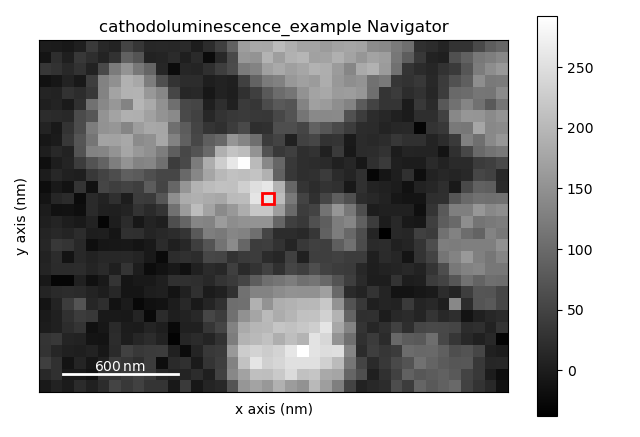

<IPython.core.display.Javascript object>


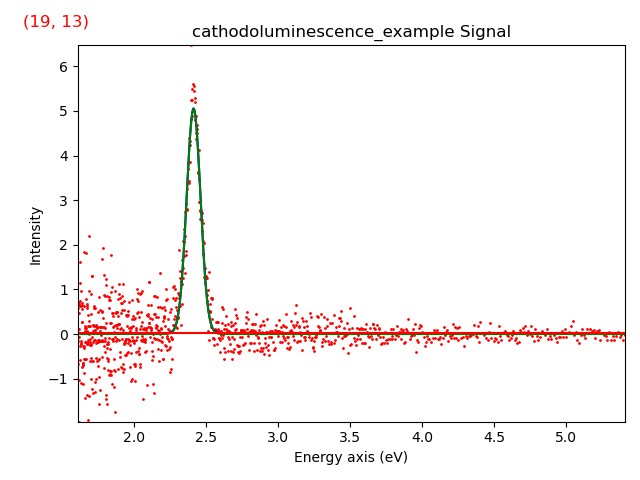

In [18]:
#Plot the fit on the raw data
m.plot(plot_components=True)

<IPython.core.display.Javascript object>


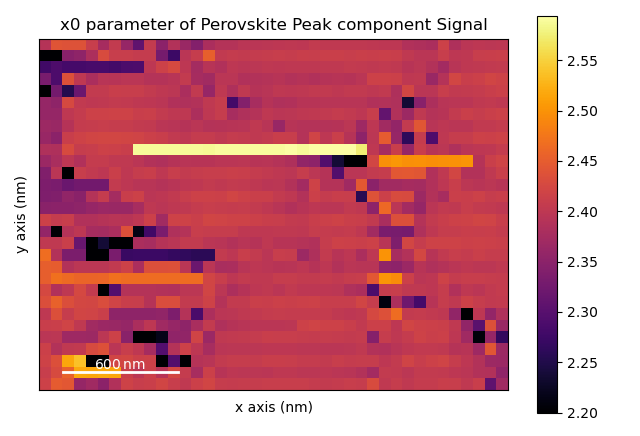

<IPython.core.display.Javascript object>


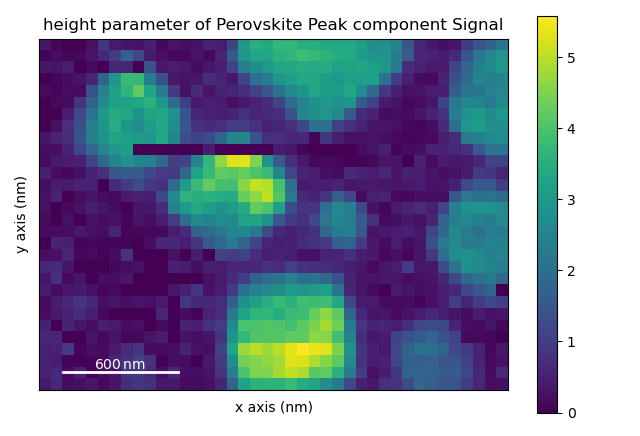

In [19]:
# Take the Gaussian component parameters as signals and plot them

# plot the x0 parameter
m_x0 = g1.x0.as_signal()
m_x0.plot(cmap='inferno')

# plot the intensity
m_intensity = g1.height.as_signal()
m_intensity.plot(cmap='viridis')

### Particle segmentation
You can do particle segmentation using model fitting:

<IPython.core.display.Javascript object>


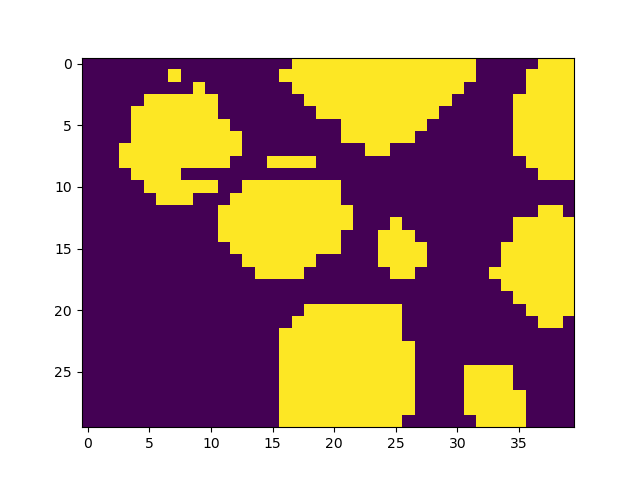

In [20]:
#Make mask to remove region where the intensity is below the mean value:
mask_treshold = m_intensity.data.mean()
mask = m_intensity.data > mask_treshold #Returns a boolean matrix mask
plt.imshow(mask)

## END
